### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

### Loading Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_file = "/content/drive/MyDrive/mlzoomcamp_data/train.csv"

# reading the dataset
df_train = pd.read_csv(train_file, header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='latin-1', on_bad_lines='skip')

### Create Dataset

In [ ]:
tweet_ls = []
sentiment_ls = []

In [ ]:
for key, value in df_train.iterrows():
  if key == 0:
    continue
  else:
    values = value[0].split(',')
    sentiment = int(values[1])
    tweet = ", ".join(values[2:])
    tweet_ls.append(tweet)
    sentiment_ls.append(sentiment)

In [ ]:
df = pd.DataFrame({
    "tweets": tweet_ls,
    "sentiments": sentiment_ls
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99993 entries, 0 to 99992
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweets      99993 non-null  object
 1   sentiments  99993 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
df.sentiments.unique()

array([0, 1])

In [ ]:
# check for duplicate tweets
len(df.tweets.unique()), len(df)

(99993, 99993)

In [ ]:
# write it into csv
df.to_csv("twitter_sentiment_dataset.csv", encoding = "utf-8", index = False)

In [ ]:
df = pd.read_csv("/content/twitter_sentiment_dataset.csv", encoding = "utf-8")
df.head()

,tweets,sentiments
0,is so sad for my APL frie...,0
1,I missed the New Moon trail...,0
2,omg its already 7:30 :O,1
3,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,i think mi bf is cheating on me!!! ...,0


In [ ]:
df.describe()

,sentiments
count,99993.000000
mean,0.564620
std,0.495809
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


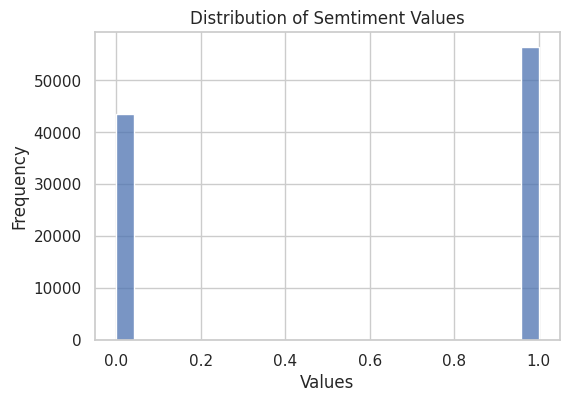

In [ ]:
# Set the style of Seaborn plot (optional)
sns.set(style="whitegrid")

# Plotting a histogram using Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='sentiments')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Semtiment Values')
plt.show()